# Module 4 Part 2:  Hypothesis testing

# Table of Contents

This module consists of 2 parts:

**Part 1** - Introduction to Inference

**Part 2** - Hypothesis testing

Each part is provided in a separate notebook file. It is recommended that you follow the order of the notebooks.


Part 2:

* [Hypothesis testing](#Hypothesis_Testing)

  * [Hypothesis testing framework](#Hypothesis_Testing_Framework)

  * [One- and two-sided tail tests](#One_and_two_sided_tail_tests)

  * [Decision errors](#Decision_errors)
  
  * [Hypothesis test methodology](#Hypothesis_test_methodology)
   
  * [Types of hypothesis tests](#Types_of_Hypothesis_Tests)
    
  * [Exercise 2: Perform a hypothesis test in Python](#Exercise_2)

<a id='Hypothesis_Testing'></a>
# Hypothesis testing

<a id='Hypothesis_Testing_Framework'></a>
## Hypothesis testing framework

We are all constantly performing non-statistical hypothesis tests throughout our daily lives. Every time somebody says something, we are judging its credibility based on previous experience, the evidence available, etc. Let's illustrate this using a classical non-statistical example: the criminal court system.

When a person is accused of a crime, they face a trial. The defendant is assumed innocent, and it is the work of the prosecutor to bring evidence for the court to make a judgement on the prosecutor's claim. The jury will decide, based on the evidence presented by the prosecutor, if the defendant is guilty beyond any reasonable doubt. If the jury does not find the evidence to be sufficient, they will not state that the defendant is innocent, they will state that the defendant is 'not guilty'. On the other hand, if the proof is deemed to be 'beyond reasonable doubt', the jury will decide that the defendant is 'guilty'.

In statistical jargon, there are two hypotheses: the common belief that the defendant is innocent, called the null hypothesis, $H_0$; and the alternative hypothesis that the prosecutor wants to prove, $H_a$: the defendant is guilty.


$H_0$: Null hypothesis - The defendant is innocent

$H_a$ or $H_1$: Alternative hypothesis - the defendant is guilty

If the jury finds the defendant guilty, it is rejecting the null hypothesis in favour of the alternative: stating that there is enough evidence to conclude that the defendant is guilty beyond any reasonable doubt. If the evidence is not beyond any reasonable doubt, the jury will conclude that the defendant is not guilty. Notice that the jury does not say innocent; innocence is not something to prove, it is the shared belief $H_0$. SImilarly, a statistician will never accept the null, they will fail to reject the null. For this reason, the alternative hypothesis is also called the research hypothesis.

In the case of statistical hypothesis testing, the practitioner is interested in finding out if a parameter equals a certain number. For example, in our previous simulation we wanted to determine:

$H_0$: $\mu = 50$

$H_a$: $\mu \neq 50$

What does 'beyond reasonable doubt' mean in this context? 

It is the probability of making a mistake that the practitioner is willing to accept or is comfortable with. Typically, this is set at 5%, which is the previously defined term **significance level $\alpha$**.

The practitioner would:

* calculate a 95% confidence interval assuming that the $H_0$: $\mu = 50$ is true, 
* collect a representative sample from the population, and 
* check if the point estimate falls within the confidence interval calculated.  

If the sample mean falls within the confidence interval under the null hypothesis, they will determine that there is no reason to think otherwise, and will fail to reject the null hypothesis.  

If, however, the sample mean is not in the confidence interval, the practitioner would deem the result highly improbable under the null hypothesis (less than 5%, since we set the significance level to 0.05 or 5%). Based on this evidence, they will reject the null in favour of the alternative. In the latter case, the information provided by the sample does not support the null hypothesis.

<a id='One_and_two_sided_tail_tests'></a>
## One- and two-sided tail tests

Because we are testing for an inequality ($H_0: \mu=50$; $H_a: \mu \neq 50$), both high and low values are considered causes for rejection. The test in this case is called a **two-sided or two-tailed test**. In the graph below, the rejection areas are highlighted in red.

Text(-3.2, 0.01, 'Reject the Null')

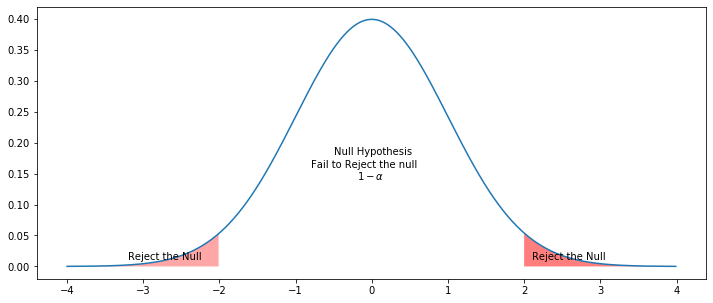

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

plt.figure(figsize=(12,5))

x1=np.arange(-4,4,0.01)
y1= stats.norm.pdf(np.arange(-4,4,0.01))
plt.plot(x1,y1)

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,4,0.01), 
                 y1= stats.norm.pdf(np.arange(2,4,0.01)) ,
                 facecolor='red',
                 alpha=0.5)

plt.text(x=-0.5, y=0.18, s= "Null Hypothesis")
plt.text(x=-0.8, y=0.16, s= 'Fail to Reject the null ')
plt.text(x=-0.2, y=0.14, s=r'$1- \alpha$')
plt.text(x=2.1, y=0.01, s= "Reject the Null")
plt.text(x=-3.2, y=0.01, s= "Reject the Null")

If our hypotheses were

$H_0$: $\mu \leqq 50$

$H_a$: $\mu > 50$

or 

$H_0$: $\mu \geqq 50$

$H_a$: $\mu < 50$

we would be rejecting only values that were too big or too small, respectively. In these cases, the tests are **one-tailed**. The first case is referred to as a **right-tailed** hypothesis test and the second one is a **left-tailed** test.

Text(2.1, 0.01, 'Reject the Null')

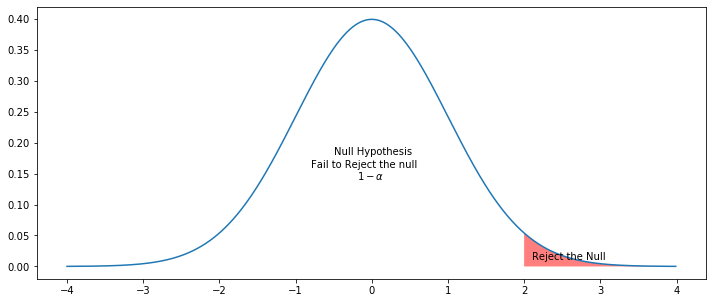

In [2]:
plt.figure(figsize=(12,5))

x1=np.arange(-4,4,0.01)
y1= stats.norm.pdf(np.arange(-4,4,0.01))
plt.plot(x1,y1)

plt.fill_between(x=np.arange(2,4,0.01), 
                 y1= stats.norm.pdf(np.arange(2,4,0.01)) ,
                 facecolor='red',
                 alpha=0.5)

plt.text(x=-0.5, y=0.18, s= "Null Hypothesis")
plt.text(x=-0.8, y=0.16, s= 'Fail to Reject the null ')
plt.text(x=-0.2, y=0.14, s=r'$1- \alpha$')
plt.text(x=2.1, y=0.01, s= "Reject the Null")


Right-tailed test

Text(-3.2, 0.05, 'Reject the Null')

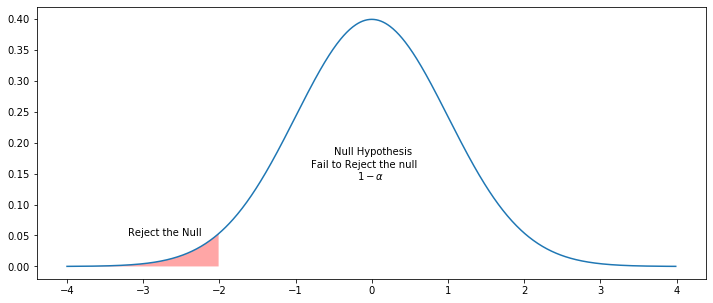

In [3]:
plt.figure(figsize=(12,5))

x1=np.arange(-4,4,0.01)
y1= stats.norm.pdf(np.arange(-4,4,0.01))
plt.plot(x1,y1)

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.text(x=-0.5, y=0.18, s= "Null Hypothesis")
plt.text(x=-0.8, y=0.16, s= 'Fail to Reject the null ')
plt.text(x=-0.2, y=0.14, s=r'$1- \alpha$')
plt.text(x=-3.2, y=0.05, s= "Reject the Null")

Left-tailed test

<a id='Decision_errors'></a>
## Decision errors

Decisions are made based on samples that are subject to sampling error. Thus, the practitioner can make a mistake. In non-statistical hypothesis tests, we cannot calculate the probability or how often we are going to make a mistake. In a statistical hypothesis test, we can based on the properties of the probability distribution that is applied.

The are two possible errors. In the court example, the jury could acquit a guilty defendant or convict an innocent.  Similarly, the practitioner could reject a null hypothesis when the null hypothesis is true, or fail to reject the null when the alternative hypothesis is true. These are called **Type 1** and **Type 2** errors, respectively.

Decision errors can be represented in a **confusion matrix**.

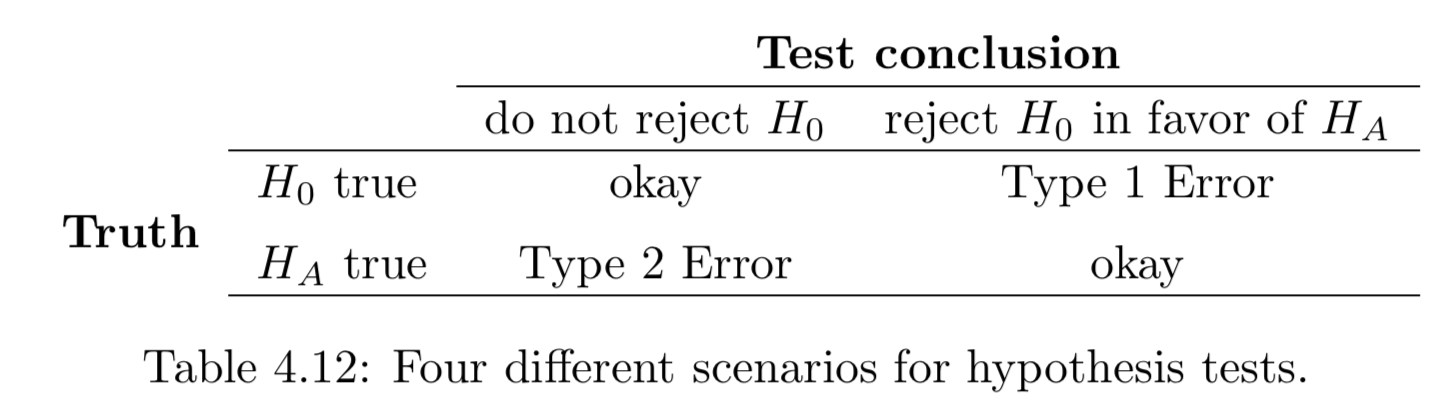

Image: Visual aid summarizing Type 1 and Type 2 errors, as defined above. Source: Dietz et al, (2017).

Note:  The concept has been expanded to data classification in Machine Learning (ML).

The probability of making a Type 1 error, the probability of rejecting the null when it is true, is indicated as the **$\alpha$** error.  The probability of making a Type 2 error, the probability of failing to reject the null when the alternative hypothesis is true, is called the **$\beta$** error.

$$
P(Type\  1\  error)=\alpha
$$
$$
P(Type\  2\  error)=\beta
$$

In the same way that the $\alpha$ error is calculated by assuming $H_0$ to be true, the $\beta$ error is calculated by assuming $H_a$ to be true.  

There is a trade-off between the $\alpha$ and $\beta$ errors. For example, if one want to be very certain of not making a type 1 error, the probability of a type 2 error increases, and vice versa. The errors will depend on the sample size and how far apart are $H_0$ and $H_a$ are.

The illustration below illustrates how $\alpha$ and $\beta$ are interrelated.

Text(0, 0.02, 'Type 2 Error')

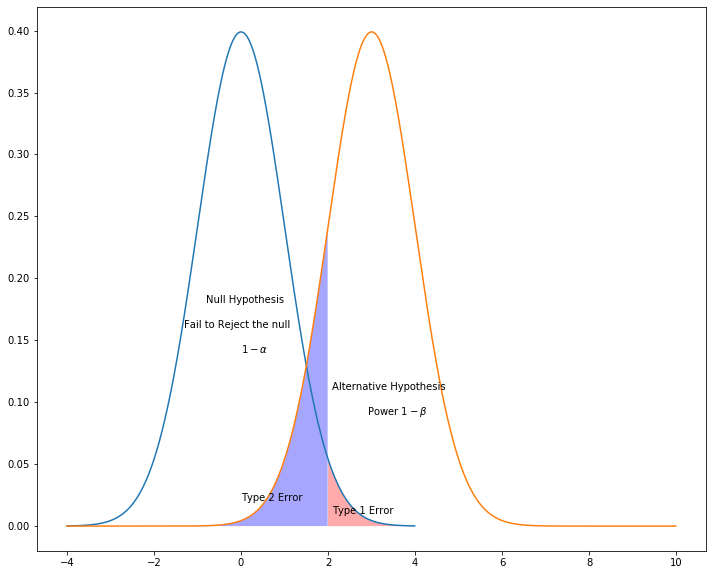

In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

plt.figure(figsize=(12,10))

x1=np.arange(-4,4,0.01)
y1= stats.norm.pdf(np.arange(-4,4,0.01))
plt.plot(x1,y1)

x2=np.arange(-4,10,0.01)
y2= stats.norm.pdf(np.arange(-4,10,0.01),loc = 3)
plt.plot(x2,y2)


plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01)) ,
                 facecolor='white',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,4,0.01), 
                 y1= stats.norm.pdf(np.arange(2,4,0.01)) ,
                 facecolor='red',
                 alpha=0.5)

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01),loc=3) ,
                 facecolor='white',
                 alpha=0.35)

plt.fill_between(x=np.arange(-4,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,2,0.01),loc=3) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,10,0.01), 
                 y1= stats.norm.pdf(np.arange(2,10,0.01),loc=3, scale=2),
                 facecolor='white',
                 alpha=0.35)

plt.text(x=-0.8, y=0.18, s= "Null Hypothesis")
plt.text(x=-1.3, y=0.16, s= 'Fail to Reject the null ')
plt.text(x=0.0, y=0.14, s=r'$1- \alpha$')
plt.text(x=2.1, y=0.11, s= "Alternative Hypothesis")
plt.text(x=2.9, y=0.09, s= 'Power ' r'$1-\beta$')
plt.text(x=2.1, y=0.01, s= "Type 1 Error")
# plt.text(x=-3.2, y=0.01, s= "Type 1 Error")
plt.text(x=0, y=0.02, s= "Type 2 Error")

<a id='Hypothesis_test_methodology'></a>
## Hypothesis test methodology

The methodology of a statistical hypothesis test is always to:
* calculate a confidence interval assuming the null hypothesis is true
* and then based on the sample statistic, reject or fail to reject the null hypothesis.

The null hypothesis is usually set as the common belief prior to the test, while the alternative hypothesis is what we want to prove by rejecting the null hypothesis. The practical reasons to do it this way is that it is stronger result to reject the null than failing to reject it. Let's formalize the steps:

#### The steps of any hypothesis test are:

Step 1: Formulate the null hypothesis and the alternative hypothesis

Step 2: Specify the level of significance to be used

Step 3: Select the test statistic

Step 4: Establish the critical value or values of the test statistic

Step 5: Determine the actual value of the test statistic

Step 6: Make a decision.

#### There are three equivalent approaches to hypothesis testing:

* Critical value:  the sample statistic is more extreme than the critical value calculated from the significance level $\alpha$


* Critical $Z_c$ value: the $Z_{sample}$ value is more extreme than the critical value $Z_c$


* p-value: the probability $p$ of the sample statistic is less than the significance level $\alpha$


* Confidence interval:  the sample statistic is outside of the confidence interval

The three approaches are equivalent and will yield the same result. We can see this mathematically below:

Once the practitioner sets the $\alpha$ value, according to the following relation:

$$
P(-Z_\frac{\alpha}{2}, \frac{\bar X - \mu}{\frac{\sigma}{\sqrt{n}}} ,+Z_\frac{\alpha}{2})=1-\alpha
$$

$-Z_\frac{\alpha}{2}$ and $+Z_\frac{\alpha}{2}$ are the critical values $Z_c$ and are calculated using the properties of the normal distribution.  Using the definition of $Z$, if we know $Z_c$ we can calculate the $X_c$.

$$
Z_c=\frac{x_c-\mu}{\sigma}
$$

Finally, the confidence interval defined by the critical values $X_c$ is the last criteria for rejection.


## Example

Let's simulate normal data with a mean of 50 and a standard deviation of 10, and suppose that this is a sample from a larger population. Let's perform some tests on this data.

In [5]:
normal_sample = stats.norm.rvs(loc=50, scale=10, size=(50,1))
print("The sample average is",str(round(normal_sample.mean(),2)))

The sample average is 52.39


Let's hypothesize that it comes from a population of average 50.0

In [6]:
h_0=50.0
ttest=stats.ttest_1samp(normal_sample,h_0)
ttest

Ttest_1sampResult(statistic=array([1.40964483]), pvalue=array([0.16496028]))

In [7]:
print("The t test statistic is",round(float(ttest.statistic),4)
    ,"and the p-value is",round(float(ttest.pvalue),4)
    ,"which means that the probability of obtaining a value of"
    ,str(round(normal_sample.mean(),1)),"just by chance (or randomly) is"
    ,str(round(float(ttest.pvalue)*100,2))
    ,"% assuming that the null hypothesis (the average is"
     ,h_0,") is true.")

The t test statistic is 1.4096 and the p-value is 0.165 which means that the probability of obtaining a value of 52.4 just by chance (or randomly) is 16.5 % assuming that the null hypothesis (the average is 50.0 ) is true.


We fail to reject the null hypothesis, that the population mean is 50.0.

Let's hypothesize that it comes from a population of average 43.0:

In [8]:
h_0=43.0
ttest=stats.ttest_1samp(normal_sample,h_0)

In [9]:
print("The t test statistic is",round(float(ttest.statistic),4)
    ,"and the p-value is",round(float(ttest.pvalue),4)
    ,"which means that the probability of obtaining a value of"
    ,str(round(normal_sample.mean(),1)),"just by chance (or randomly) is"
    ,str(round(float(ttest.pvalue)*100,2))
    ,"%")

The t test statistic is 5.5312 and the p-value is 0.0 which means that the probability of obtaining a value of 52.4 just by chance (or randomly) is 0.0 %


The probability assuming that $H_0$ is true is less than 5%. This is below our risk appetite, so we reject the null hypothesis in favour of the alternative, that the average is different than 45.0.

<a id='Types_of_Hypothesis_Tests'></a>
## Types of hypothesis tests

So far, all concepts have been illustrated with the simplest scenario, which is when we want to know if the average of one population equals a specific value. This is a **one-sample hypothesis test**, because we have only one sample.

In other circumstances, the practitioner may want to compare if two populations have the same average. Here, the practitioner is comparing two populations and the test is called a **two-sample hypothesis test**.

However, there is a caveat in the case of two-sample hypothesis tests. Let's look at an example to explain:

Imagine that the manufacturer of a gas additive claims that their product can reduce gas consumption by 10%. We design an experiment where different makes and models are run with and without this additive. We then take the gas consumption average across cars with and without the additive and perform a hypothesis test under the null hypothesis that the additive has no effect on gas consumption.

Our experiment will lack sensitivity, because not only will gas consumption depend on the presence or absence of the additive, it will also depend on the intrinsic variability between makes and models.

To solve this, we can conduct a **paired test**, where the same car's gas consumption is measured with and without the additive, we calculate the consumption difference for each car, and we check if the differences equal zero. In this way, we account for the variability among makes and models by subtracting each one against itself.

We will illustrate this by doing an exercise using data from the OpenIntro textbook.

<a id='Exercise_2'></a>
### Exercise 2:  Perform a hypothesis test in Python

Use the dataset provided: brain_size.csv (source: Dietz et al, 2017).

Using the scipy.stats functions 
* ttest_1samp,
* vttest_ind and 
* ttest_rel

perform the following hypothesis tests:

1. VIQ = 0 (one-sample t-test)

2. female_viq = male_viq (two-sample t-test)

3. FSIQ = PIQ (paired t-test)

In [10]:
#your work here

### Solution

In [11]:
import pandas as pd
data = pd.read_csv('./module04/brain_size.csv', sep=';', na_values=".")
data = data.drop("Unnamed: 0", axis=1)
data.head(10)

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545
5,Female,99,90,110,146.0,69.0,928799
6,Female,138,136,131,138.0,64.5,991305
7,Female,92,90,98,175.0,66.0,854258
8,Male,89,93,84,134.0,66.3,904858
9,Male,133,114,147,172.0,68.8,955466


In [12]:
data.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


From Dietz et al (2017):

Full Scale Intelligence Quotient (FSIQ)

Verbal Intelligence Quotient (VIQ)

Performance Intelligence Quotient (PIQ)

In [13]:
# groupby: splitting a dataframe on values of categorical variables:
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 109.45)
('Male', 115.25)


In [14]:
# groupby_gender is a powerful object that exposes many operations on the resulting group of dataframes:
groupby_gender.mean()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,
Female,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,115.0,115.25,111.60,166.444444,71.431579,954855.4


One-sample t-test: testing the value of a population mean

scipy.stats.ttest_1samp() tests if the population mean of data is likely to be equal to a given value (technically if observations are drawn from a Gaussian distributions of a given population mean). It returns the t statistic, and the p-value. The p-value measures the probability of getting a specific value assuming the null hypothesis is true just by random sampling variability.

This is a two-sided test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean, popmean.

In the test below, the hypothesis is that the overall VIQ equals zero.  From the table above, the overall VIQ average is 112.35. The t-test assuming a $H_0: \mu=0$ is 30.  The probability of obtaning this statistic or a mean of 112.35 when the actual population value is zero, $H_0$, just by random sampling variability, is very small: one in $10^{28}$.  The probability is very small, so we reject the null hypothesis, $H_0: \mu = 0$.

In [15]:
stats.ttest_1samp(data['VIQ'], 0)

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

2-sample t-test: testing for difference across populations

We have seen above that the mean VIQ in the male and female populations were different. To test if this is significant, we do a two-sample t-test with scipy.stats.ttest_ind(). This is a two-sided test for the null hypothesis that two independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

In this case, the probability of obtaining the measured difference between males and femals is 44% just by sampling variability as per the p-value. This probability is very high, so we fail to reject the null hypothesis and we accept that male and females have the same VIQ.

In [16]:
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)

Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44452876778583217)

Paired tests: repeated measurements on the same individuals

PIQ, VIQ, and FSIQ give three measures of IQ. Let us test if FISQ and PIQ are significantly different. Can we just use a two-sample test?

The problem with this approach is that it forgets that there are links between observations: FSIQ and PIQ are measured on the same individuals. Thus, the variance due to inter-subject variability is confounded, and can be removed, using a "paired test", also known as a "repeated measures test":

In [17]:
stats.ttest_rel(data['FSIQ'], data['PIQ']) 

Ttest_relResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

This is equivalent to a one-sample test on the difference:

In [18]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0) 

Ttest_1sampResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

Let's compare this result against the two-sample t-test:

In [19]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])

Ttest_indResult(statistic=0.465637596380964, pvalue=0.6427725009414841)

The p-value in the two-sample t-test approach is 64% while in the paired test it is 8%. By testing the paired differences between each individual in the population instead of the difference between the two populations, we removed the inter-subject variability.

Still, even though the probability of the observed difference decreased from 64% to 8%, 8% is above our risk appetite of 5%, thus we fail to reject the null hypothesis.

**End of Module.**

You have reached the end of this module. 

If you have any questions, please reach out to your peers using the discussion boards. If you and your peers are unable to come to a suitable conclusion, do not hesitate to reach out to your instructor on the designated discussion board.

When you are comfortable with the content, and have practiced to your satisfaction, you may proceed to any related assignments, and to the next module.

# References

Diez, D., Barr, C. & Çetinkaya-Rundel, M. (2017). Chapter 4: Foundations for inference. OpenIntro Statistics (3rd Ed.). https://www.openintro.org/stat/textbook.php?stat_book=os